# F04
- **데이터 분석**
  - **요구사항명** : 월별 평균 종가 계산
  - **요구사항 명세** : 2021년 이후 데이터를 월별로 그룹화하여 
  평균 종가를 계산하여 시각화

1. Date 컬럼만 날짜형으로 바꾸고

2. 문자열로 연–월(YYYY-MM)을 뽑아서 새로운 컬럼 만들고

3. groupby 로 월별 평균을 구한 뒤

4. plot 한 줄

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### CSV 불러오고 Date를 datatime으로 바꾸기

In [24]:
def file_open_by_numpy():
    np_arr = np.loadtxt('NFLX.CSV', delimiter=",", encoding='cp949', dtype=str) # 텍스트 파일을 읽어와 Numpy 배열로 변환
    return np_arr

df = pd.read_csv('NFLX.csv', encoding = 'cp949', usecols = ['Date', 'Open', 'High', 'Low', 'Close'])

In [25]:
df['Date'] = pd.to_datetime(df['Date'])  # Data 값을 날짜 객체로 변환 

### 2021-01-01 이후 필터

In [26]:
df = df[df['Date'] >= '2021-01-01']

### 연-월 문자열 컬럼 만들기

In [27]:
df['YearMonth'] = df['Date'].dt.strftime('%Y-%m')

### 월별 평균 종가 계산

In [28]:
monthly = df.groupby('YearMonth')['Close'].mean().reset_index()

### YearMonth를 다시 날짜로 (x축으로 쓰기 위해)

In [31]:
monthly['YearMonth'] = pd.to_datetime(monthly['YearMonth'])

### 시각화

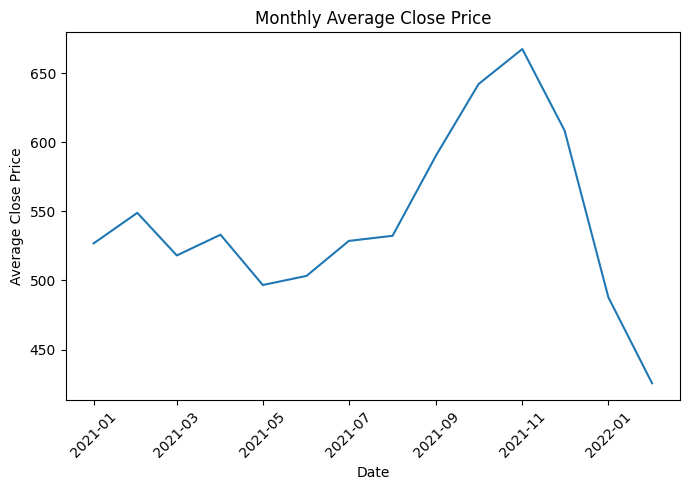

In [37]:
plt.figure(figsize=(7,5))
plt.plot(monthly['YearMonth'], monthly['Close'])
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)  # 글자 겹치지 않게 회전
plt.tight_layout()
plt.show()